# Assignment 2 - Elementary Probability and Information Theory 
# Boise State University DL - Dr. Kennington

### Instructions and Hints:

* This notebook loads some data into a `pandas` dataframe, then does a small amount of preprocessing. Make sure your data can load by stepping through all of the cells up until question 1. 
* Most of the questions require you to write some code. In many cases, you will write some kind of probability function like we did in class using the data. 
* Some of the questions only require you to write answers, so be sure to change the cell type to markdown or raw text
* Don't worry about normalizing the text this time (e.g., lowercase, etc.). Just focus on probabilies. 
* Most questions can be answered in a single cell, but you can make as many additional cells as you need. 
* When complete, please export as HTML. Follow the instructions on the corresponding assignment Trello card for submitting your assignment. 

In [1]:
import pandas as pd 

data = pd.read_csv('pnp-train.txt',delimiter='\t',encoding='latin-1', # utf8 encoding didn't work for this
                  names=['type','name']) # supply the column names for the dataframe

# this next line creates a new column with the lower-cased first word
data['first_word'] = data['name'].map(lambda x: x.lower().split()[0])

In [2]:
data[:10]

,type,name,first_word
0,drug,Dilotab,dilotab
1,movie,Beastie Boys: Live in Glasgow,beastie
2,person,Michelle Ford-Eriksson,michelle
3,place,Ramsbury,ramsbury
4,place,Market Bosworth,market
5,drug,Cyanide Antidote Package,cyanide
6,person,Bill Johnson,bill
7,place,Ettalong,ettalong
8,movie,The Suicide Club,the
9,place,Pézenas,pézenas


In [3]:
data.describe()

,type,name,first_word
count,21001,21001,21001
unique,5,20992,13703
top,movie,George Washington,the
freq,6262,2,635


## 1. Write a probability function/distribution $P(T)$ over the types. 

Hints:

* The Counter library might be useful: `from collections import Counter`
* Write a function `def P(T='')` that returns the probability of the specific value for T
* You can access the types from the dataframe by calling `data['type']`

In [4]:
from collections import Counter
counted = Counter(data['type'])
length = len(data)
def P(T=''):
    return counted[T]/length

## 2. What is `P(T='movie')` ?

In [5]:
P(T='movie')

0.29817627732012764

## 3. Show that your probability distribution sums to one.

In [6]:
types = set(data['type'])
total = 0
for a_type in types:
    total += P(T=a_type)
total

1.0

## 4. Write a joint distribution using the type and the first word of the name

Hints:

* The function is $P2(T,W_1)$
* You will need to count up types AND the first words, for example: ('person','bill)
* Using the zip function was useful for me here

In [7]:
pairs = [(data['type'][x], data['first_word'][x]) for x in range(len(data))]
counted2 = Counter(pairs)
def P2(T='', W1=''):
    return counted2[(T, W1)]/length

## 5. What is P2(T='person', W1='bill')? What about P2(T='movie',W1='the')?

In [8]:
P2(T='person', W1='bill')

0.00047616780153326033

In [9]:
P2(T='movie', W1='the')

0.02747488214846912

## 6. Show that your probability distribution P(T,W1) sums to one.

In [10]:
types = set(data['type'])
firsts = set(data['first_word'])
total = 0
for a_type in types:
    for a_first in firsts:
        total += P2(T=a_type, W1=a_first)
total

0.9999999999998119

## 7. Make a new function Q(T) from marginalizing over P(T,W1) and make sure that Q(T) sums to one.

Hints:

* Your Q function will call P(T,W1)
* Your check for the sum to one should be the same answer as Question 3, only it calls Q instead of P.

In [11]:
def Q(T=''):
    return sum([P2(T=T, W1=x) for x in set(data['first_word'])])

In [12]:
Q(T='movie')

0.298176277320125

In [13]:
types = set(data['type'])
total = 0
for a_type in types:
    total += Q(T=a_type)
total

1.000000000000027

## 8. What is the KL Divergence of your Q function and your P function for Question 1?

* Even if you know the answer, you still need to write code that computes it.

In [14]:
import math
kld = 0
for a_type in set(data['type']):
    if P(T=a_type) != 0:
        kld += Q(T=a_type)*math.log(Q(T=a_type)/P(T=a_type))
kld

2.709282517657837e-14

## 9. Convert from P(T,W1) to P(W1|T) 

Hints:

* Just write a comment cell, no code this time. 
* Note that $P(T,W1) = P(W1,T)$

## $P(W_1|T) = \frac{P(W_1,T)}{P(T)}$

## 10. Write a function `Pwt` (that calls the functions you already have) to compute $P(W_1|T)$.

* This will be something like the multiplication rule, but you may need to change something

In [15]:
def Pwt(T='', W1=''):
    return P2(T, W1)/P(T)

## 11. What is P(W1='the'|T='movie')?

In [16]:
Pwt(T='movie', W1='the')

0.09214308527626956

## 12. Use Baye's rule to convert from P(W1|T) to P(T|W1). Write a function Ptw to reflect this. 

Hints:

* Call your other functions.
* You may need to write a function for P(W1) and you may need a new counter for `data['first_word']`

In [17]:
counted3 = Counter(data['first_word'])
def P3(W1=''):
    return counted3[W1]/length

def Ptw(T='', W1=''):
    return (Pwt(T=T, W1=W1)*P(T=T))/P3(W1=W1)

## 13 
### What is P(T='movie'|W1='the')? 
### What about P(T='person'|W1='the')?
### What about P(T='drug'|W1='the')?
### What about P(T='place'|W1='the')
### What about P(T='company'|W1='the')

In [18]:
Ptw(T='movie', W1='the')

0.9086614173228347

In [19]:
Ptw(T='person', W1='the')

0.0

In [20]:
Ptw(T='drug', W1='the')

0.0

In [21]:
Ptw(T='place', W1='the')

0.0015748031496062992

In [22]:
Ptw(T='company', W1='the')

0.08976377952755905

## 14 Given this, if the word 'the' is found in a name, what is the most likely type?

movie

## 15. Is Ptw(T='movie'|W1='the') the same as Pwt(W1='the'|T='movie') the same? Why or why not?

No.
Ptw(T='movie', W1='the') = 0.9087
Pwt(T='movie', W1='the') = 0.0921

Ptw and Pwt have opposite meanings. Ptw is the probability that a name starting with 'the' is a movie.
Pwt is the probability that any movie starts with the word 'the'.

## 16. Do you think modeling Ptw(T|W1) would be better with a continuous function like a Gaussian? Why or why not?



No. The pnp data only contains discrete values, and no continuous variables. As a result, there is no continuous function that would provide better results.

## 17. 
* Load the `rivers.csv` file and print out a histogram
* Which disitrbutions do you think would fit the data for the `x` column? Here is a list: https://en.wikipedia.org/wiki/Category:Continuous_distributions
* Hint: look at some of the exponential distributions, and maybe the Pareto, you can always use Gaussian
* Use the principle of Maximum Entropy to detemrine which of the two distributions would best fit your data (you can sum over all values in your data)
* You will need to estimate the parameters needed for each distribution (you may need to write maximum likelihood estimation functions for estimating your parameters)
* You can use built-in python functions to model the (pdf) distribution, if they exist. Otherwise, you may need to write your own
* Show the Maximum Entropy calculations. 
* Calculate the KL divergence on the two distributions (in both directions)
* make nice markdown commments so I know where everything is

In [23]:
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('rivers.csv') 

In [25]:
data.describe()

,Unnamed: 0,x
count,141.000000,141.000000
mean,71.000000,591.184397
std,40.847277,493.870842
min,1.000000,135.000000
25%,36.000000,310.000000
50%,71.000000,425.000000
75%,106.000000,680.000000
max,141.000000,3710.000000


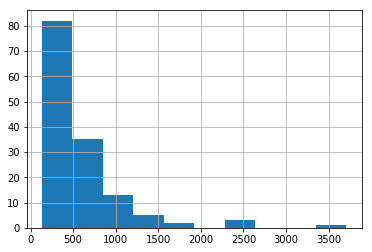

In [26]:
data.x.hist()

### Exponential Distribution
Using scale=381 (scale is 1/lambda)

Used the following code to find the best scale factor:
```python
scales = [ x for x in range(1, 1000, 10) ]
bestscale = 0
best = 0

for scale in scales:
    score = sum( [ P_exponential(X=x, S=scale) for x in data['x'] ] )
    if score > best:
        best = score
        bestscale = scale
print(best)
print(bestscale)
```

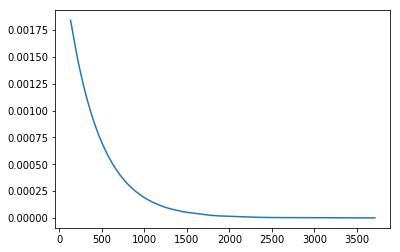

In [27]:
from scipy.stats import expon, pareto

def P_exponential(X=0, S=381):
    return expon.pdf(X, scale=S)

plt.plot(sorted(data.x), P_exponential(sorted(data.x)), '-')

### Pareto Distribution
Using scale=770 with location=-640 and shape=4
I used the following code with various ranges to find this fit:
```python
scales = [ x for x in range(700, 900, 10) ]
locations = [ x for x in range(-700, -600, 10)]
shapes = [2,3,4]
combos = product(shapes, scales, locations)
bestcombo = []
best = 0

for combo in combos:
    score = sum( [ P_pareto(X=x, B=combo[0], S=combo[1], L=combo[2]) for x in data['x'] ] )
    if P_pareto(X=135, B=combo[0], S=combo[1], L=combo[2]) > 0 and score > best:
        best = score
        bestcombo = combo
print(best)
print(bestcombo)
```

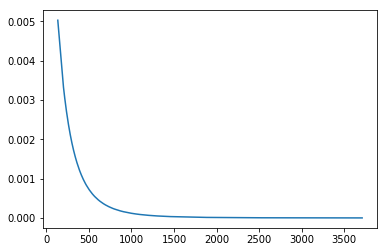

In [28]:
from itertools import product

def P_pareto(X=0, B=4, S=770, L=-640):
    return pareto.pdf(X, b=B, scale=S, loc=L)

plt.plot(sorted(data.x), P_pareto(X=sorted(data.x)), '-')

**The differing Maximum Entropy vales for each distribution:**

In [29]:
def entropy(func, X):
    return -1.0 * sum([ func(x) * math.log(func(x)) for x in X])

In [30]:
print("Exponential Distribution Entropy:")
entropy(P_exponential, data['x'])

Exponential Distribution Entropy:


0.7871390026579367

In [31]:
print("Pareto Distribution Entropy:")
entropy(P_pareto, data['x'])

Pareto Distribution Entropy:


1.0589418128648698

**The KL divergence from exponential to pareto and pareto to exponential respectively:**

In [35]:
import math
def KLD(funcA, funcB, X):
    kld = 0
    for value in X:
        kld += funcA(X=value)*math.log(funcA(X=value)/funcB(X=value))
    return kld

In [36]:
print("Exponential to Pareto:")
KLD(P_exponential, P_pareto, data['x'])

Exponential to Pareto:


-0.037608290232232486

In [37]:
print("Pareto to Exponential:")
KLD(P_pareto, P_exponential, data['x'])

Pareto to Exponential:


0.06904027884819575